In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [4]:

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)
print(Base.classes.keys())



['measurement', 'station']


In [6]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23')

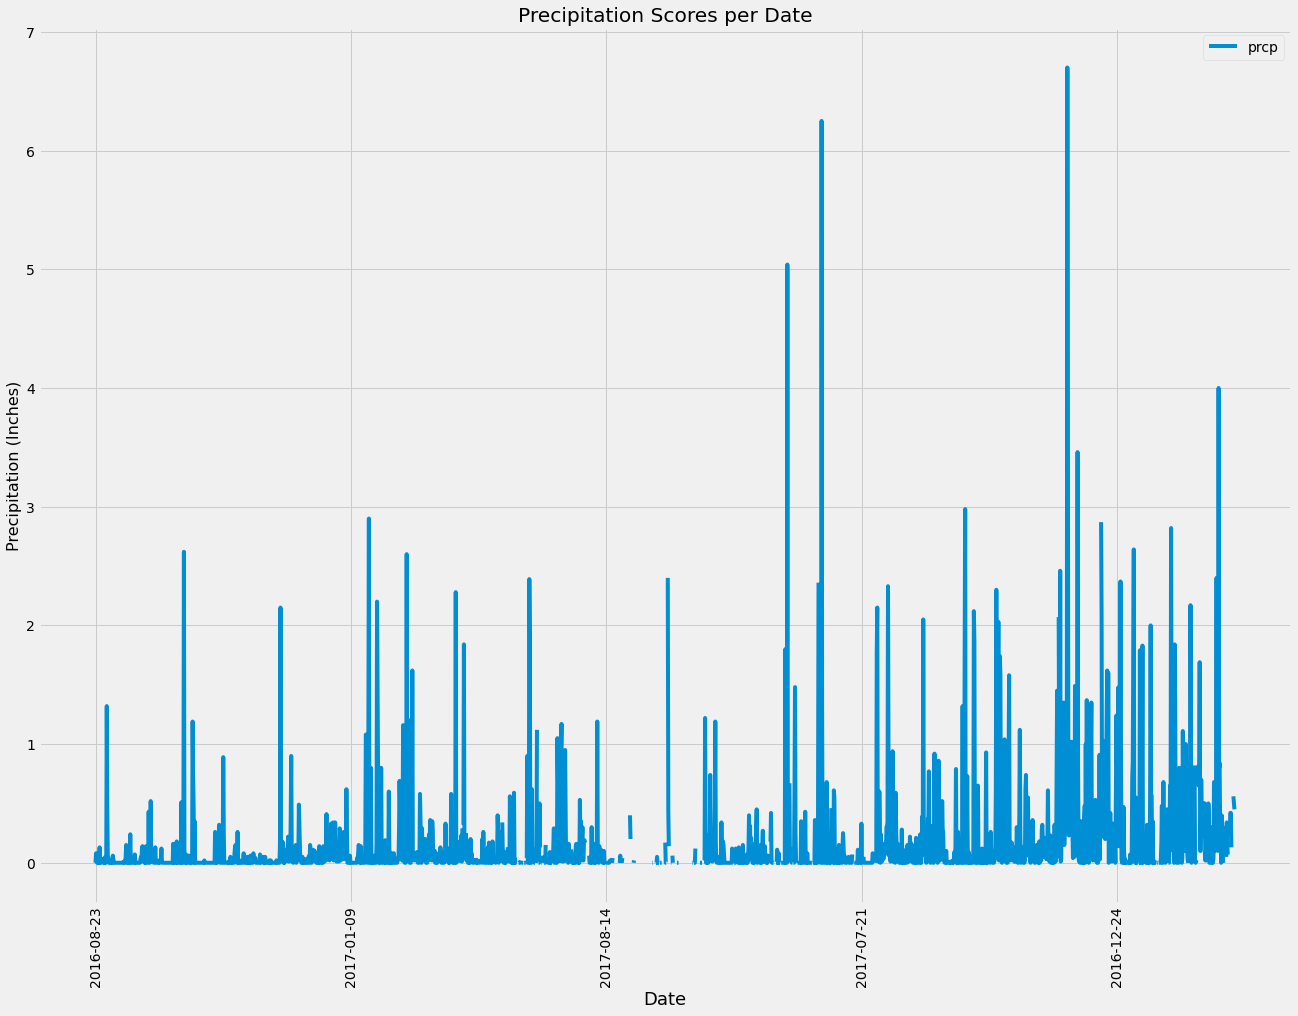

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent daengineta point in the database. 
# Calculate the date one year from the last date in data set.

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

last_tweleve_months = dt.date(2017,8,23)- dt.timedelta(days=365)
last_tweleve_months

# Perform a query to retrieve the data and precipitation scores

p_s_data= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_tweleve_months).all()
p_s_data

#Save the query results as a Pandas DataFrame and set the index to the date column
#sort the dataframe by date
p_s_df = pd.DataFrame(p_s_data, columns= ['date','prcp'])
#p_s_df.set_index('date', inplace=True)
p_s_df


#Use Pandas Plotting with Matplotlib to plot the data
p_s_df.plot(x= 'date', y='prcp', rot=90, figsize=(20,15))
#plt.xticks(tick_locations, p_s_df['ate'], rotation="vertical")
# Set x axis and tick locations
#x_axis = np.arange(len(p_s_df))
#tick_locations = [value for value in x_axis]

#ax.tick_params(axis='y', labelsize=14)
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.grid(True)

plt.title("Precipitation scores", size=18)
plt.ylabel("Precipitation (Inches)", size=16)
plt.xlabel("Date", size=18)

# Set a title for the chart
plt.title("Precipitation Scores per Date")

plt.show()
#plt.tight_layout()






In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_s_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
total_s= session.query(func.count(Station.station)).all()
total_s

[(9)]

In [12]:

# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
                             


OperationalError: (sqlite3.OperationalError) Could not decode to UTF-8 column 'measurement_station' with text 'SQLite format 3'
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
              func.avg((Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

SyntaxError: unexpected EOF while parsing (<ipython-input-13-87f28f9d5413>, line 3)

In [14]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).
t_s_tweleve_m = session.query(Measurement.station,Measurement.tobs).\
filter(Measurement.station == "USC00519281").filter(Measurement.date >= last_tweleve_months).all()


Text(0.5, 0, 'Temperature')

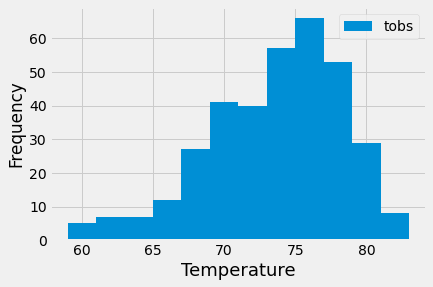

In [15]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


tobs_df = pd.DataFrame(t_s_tweleve_m)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

tobs_df.plot(kind= "hist", bins=12)
plt.xlabel("Temperature", size=18)
 



# Close session

In [16]:
# Close Session
session.close()